<a href="https://colab.research.google.com/github/hpbowala/ComputerVisionAssignment/blob/main/249290X_ComputerVisionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
#connect drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
base_path = '/content/drive/MyDrive/ComputerVissionAssignment/a1images/'

### Question 1

In [4]:
#read image from the folder
q1b_image_path = base_path + 'emma.jpg'
q1b_image = cv.imread( q1b_image_path, cv.IMREAD_GRAYSCALE)
assert q1b_image is not None
#display image
#cv2_imshow(q1b_image)


In [5]:
c = np.array([(50, 50), (51, 100), (150,100),(151,255)])

t1 = np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
#51, 100, num = 100 - 50
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0]+1, c[2,1], c[2,0]-c[1,0]).astype('uint8')  # 52 → 150
t4 = np.linspace(c[2,0]+1, 255, 255-c[2,0]).astype('uint8')

In [6]:
print(0, c[0,1], c[0,0]+1-0)
print(c[0,1]+1, c[1,1], c[1,0]-c[0,0])
print(c[1,0]+1, c[2,1], c[2,0]-c[1,0])
print(c[2,0]+1, c[3,1], 255-c[2,0])

0 50 51
51 100 1
52 100 99
151 255 105


In [7]:
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
image_transformed = cv.LUT(q1b_image, transform)


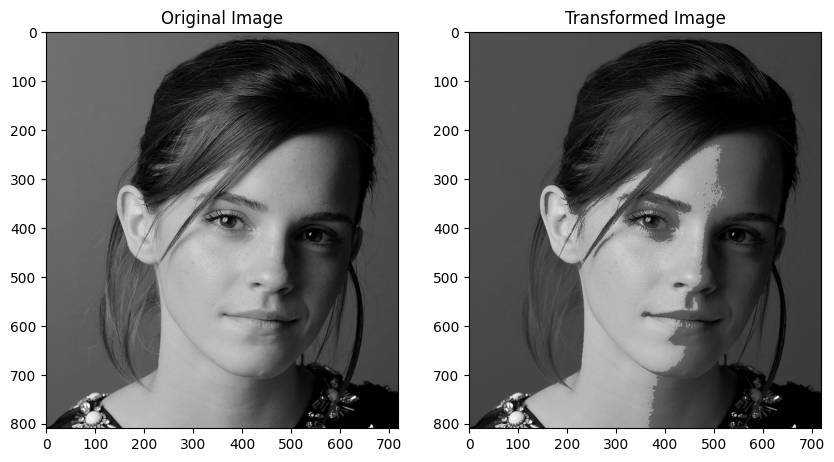

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(q1b_image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()

### Question 2

In [9]:
q2_img_path = base_path + "brain_proton_density_slice.png";
q2_img = cv.imread(q2_img_path, cv.IMREAD_GRAYSCALE)
assert q2_img is not None

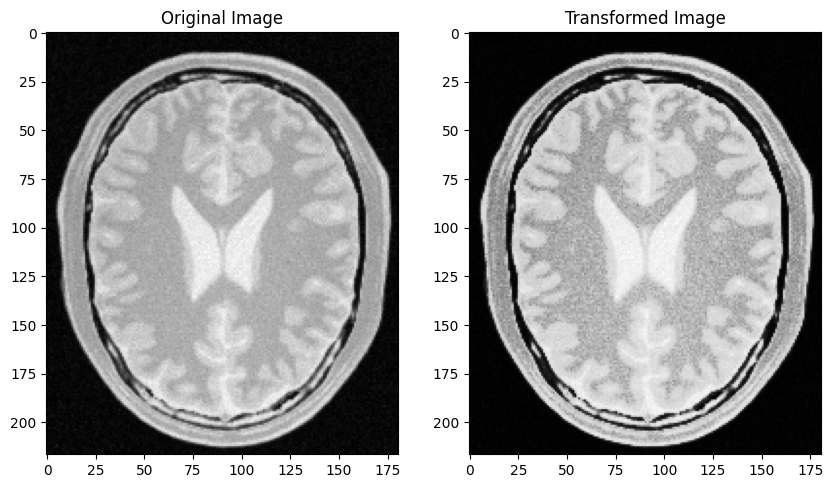

In [10]:
#accentuate gray matter and white matter

cntrlpt2 = np.array([(100, 40), (180, 200), (255, 255)])

q2t1 = np.linspace(0, cntrlpt2[0,1], cntrlpt2[0,0]-0 + 1).astype('uint8')
q2t2 = np.linspace(cntrlpt2[0,1]+1, cntrlpt2[1,1], cntrlpt2[1,0]-cntrlpt2[0,0]).astype('uint8')
q2t3 = np.linspace(cntrlpt2[1,1]+1, cntrlpt2[2,1], cntrlpt2[2,0]-cntrlpt2[1,0]).astype('uint8')

q2_transform = np.concatenate((q2t1, q2t2), axis=0).astype('uint8')
q2_transform = np.concatenate((q2_transform, q2t3), axis=0).astype('uint8')
q2_transformed = cv.LUT(q2_img, q2_transform)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(q2_img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(q2_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()


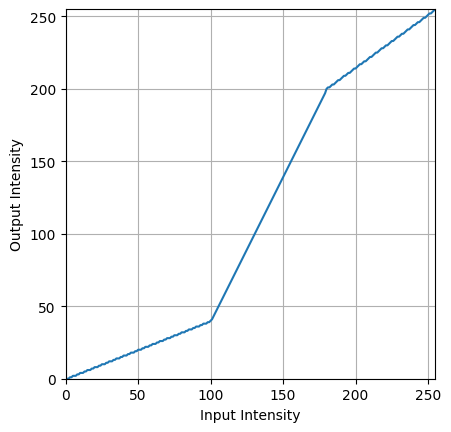

In [11]:
#plot graph
fig, ax = plt.subplots()
ax.plot(q2_transform)
ax.set_xlabel(r'Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.grid(True)
plt.show()

256


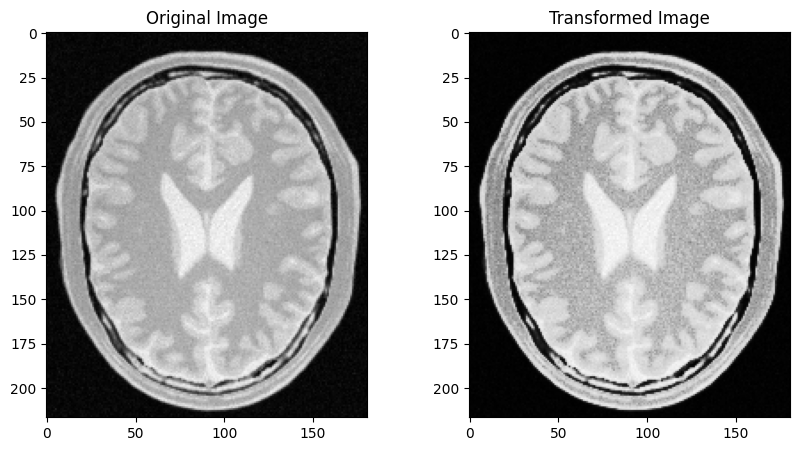

In [12]:
cntrlpt2 = np.array([(0, 0), (100, 40), (180, 200), (255, 255)])

q2_t1 = np.linspace(cntrlpt2[0, 1], cntrlpt2[1, 1], cntrlpt2[1, 0] - cntrlpt2[0, 0] + 1, endpoint=True).astype('uint8')
q2_t2 = np.linspace(cntrlpt2[1, 1], cntrlpt2[2, 1], cntrlpt2[2, 0] - cntrlpt2[1, 0] + 1, endpoint=True).astype('uint8')
q2_t3 = np.linspace(cntrlpt2[2, 1], cntrlpt2[3, 1], cntrlpt2[3, 0] - cntrlpt2[2, 0] + 1, endpoint=True).astype('uint8')


q2_transform = np.concatenate((q2_t1[:-1], q2_t2[:-1], q2_t3), axis=0).astype('uint8')

print(len(q2_transform))

q2_transformed = cv.LUT(q2_img, q2_transform)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(q2_img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(q2_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()


## Question 3 - Gamma Correction

In [13]:
q3_img_path = base_path + "highlights_and_shadows.jpg";
q3_img = cv.imread(q3_img_path, cv.IMREAD_COLOR)

assert q3_img is not None

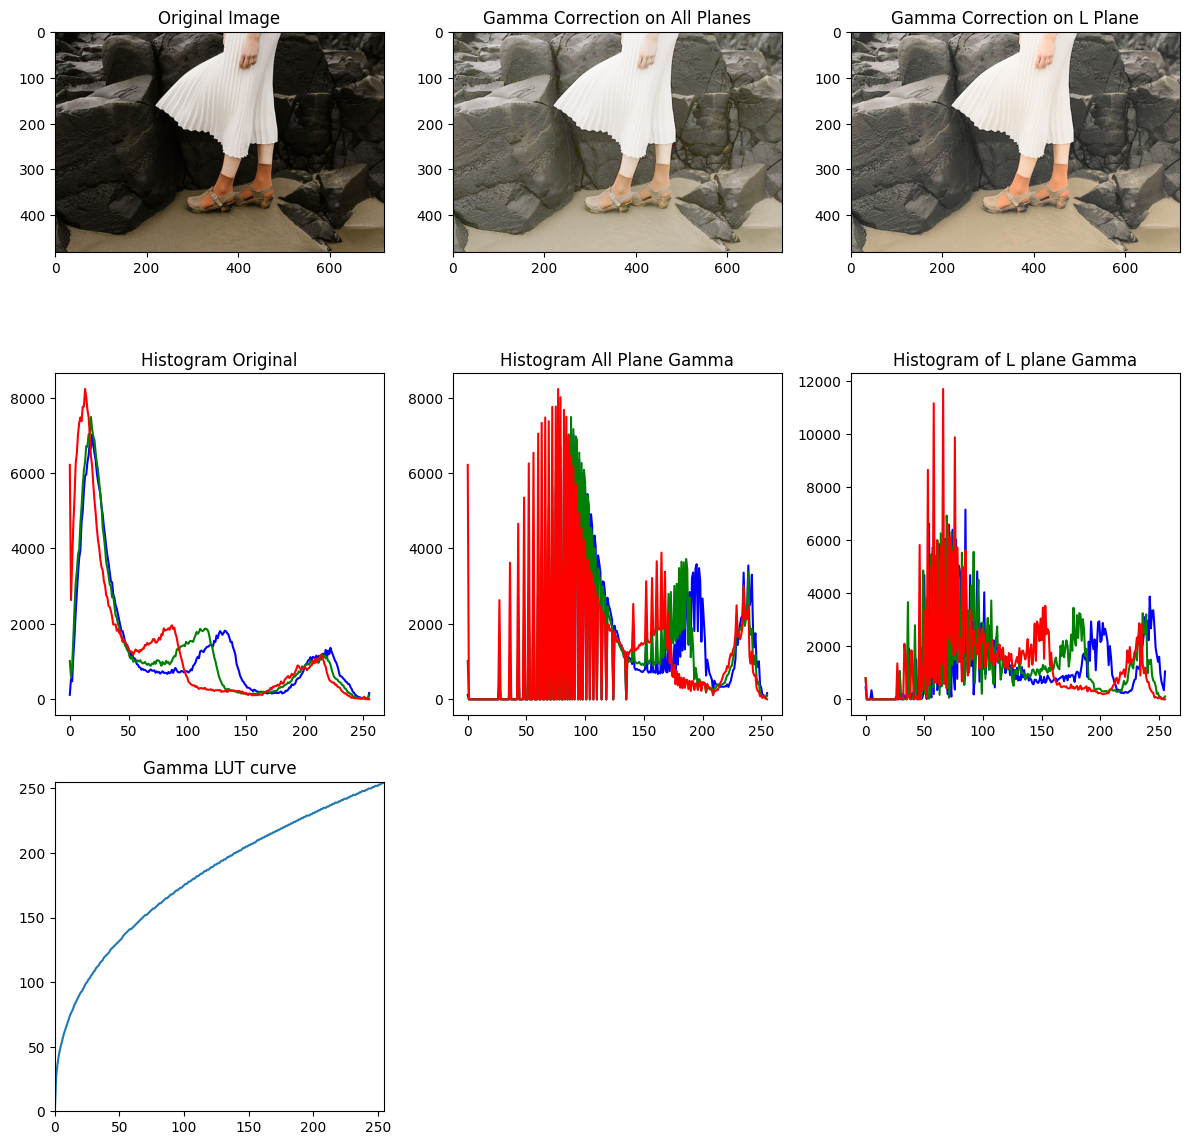

In [14]:
gamma = 2.5
table = np.array([(i/255.0)**(1.0/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

#convert bgr imread to rgb
q3_img_rgb = cv.cvtColor(q3_img, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(q3_img, cv.COLOR_BGR2RGB)
l_gamma = cv.cvtColor(q3_img, cv.COLOR_BGR2LAB)

#transform gamma in all 3 planes in LAB color space
img_gamma = cv.LUT(img_gamma, table)

#gamma correction in L plane only
L, a, b = cv.split(l_gamma)
l_gamma = cv.LUT(L, table)
l_gamma = cv.merge((l_gamma, a, b))
l_gamma = cv.cvtColor(l_gamma, cv.COLOR_LAB2BGR)
l_gamma = cv.cvtColor(l_gamma, cv.COLOR_BGR2RGB)

f, ax3 = plt.subplots(3,3, figsize=(12,12))
ax3[0,0].imshow(q3_img_rgb)
ax3[0,0].set_title('Original Image')
ax3[0,1].imshow(img_gamma)
ax3[0,1].set_title('Gamma Correction on All Planes')
ax3[0,2].imshow(l_gamma)
ax3[0,2].set_title('Gamma Correction on L Plane')

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([q3_img_rgb], [i], None, [256], [0,256])
    ax3[1,0].plot(hist_orig, color = c)
    ax3[1,0].set_title('Histogram Original')
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    ax3[1,1].plot(hist_gamma, color = c)
    ax3[1,1].set_title('Histogram All Plane Gamma')
    hist_l_gamma = cv.calcHist([l_gamma], [i], None, [256], [0,256])
    ax3[1,2].plot(hist_l_gamma, color = c)
    ax3[1,2].set_title('Histogram of L plane Gamma')

ax3[2,0].plot(table)
ax3[2,0].set_xlim(0,255)
ax3[2,0].set_ylim(0,255)
ax3[2,0].set_aspect('equal')
ax3[2,0].set_title('Gamma LUT curve')

ax3[2,1].axis('off')
ax3[2,2].axis('off')

plt.tight_layout()
plt.show()

## Question 4


In [15]:
q4_img_path = base_path + "spider.png";
q4_img = cv.imread(q4_img_path, cv.IMREAD_COLOR)
assert q4_img is not None

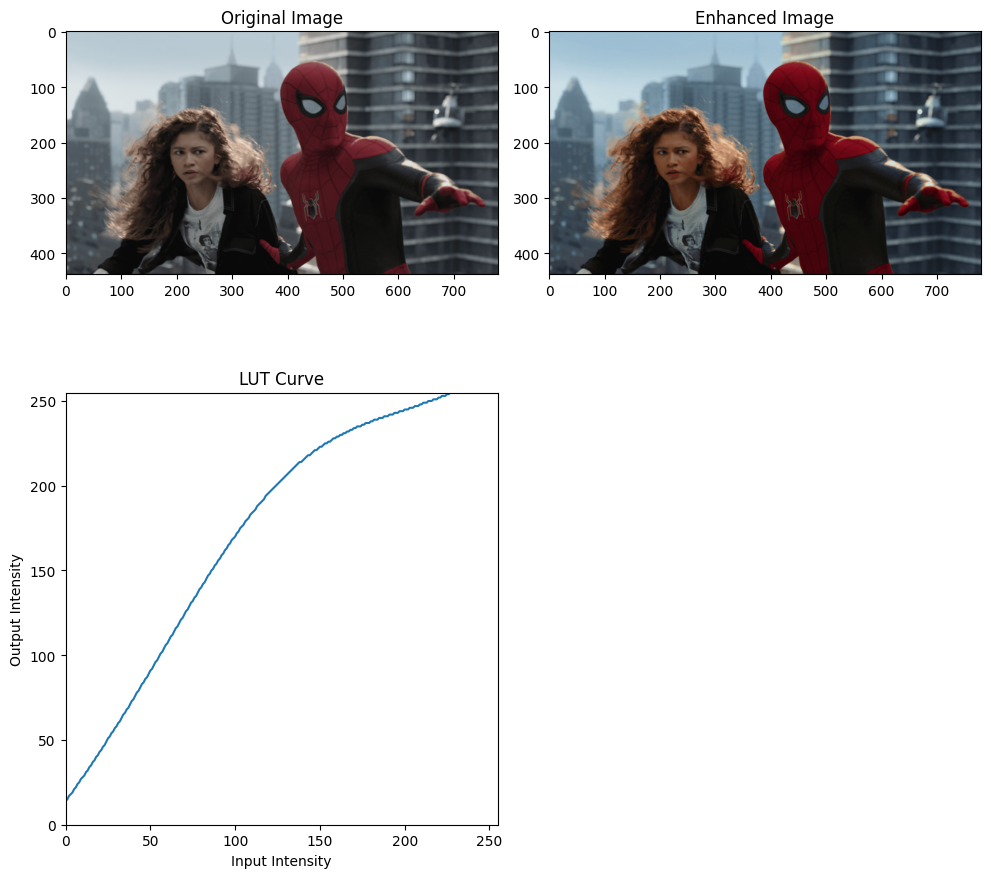

In [16]:
sigma = 70.0
a = 0.60
q4_img_rgb = cv.cvtColor(q4_img, cv.COLOR_BGR2RGB)
q4_hsv = cv.cvtColor(q4_img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(q4_hsv)

#build f(x)

q4_x = np.arange(256).astype('float32')
eqp1 = a * 128.0 * np.exp(-(( q4_x - 128.0) ** 2.0)/ (2.0 * sigma ** 2.0))
fx = np.minimum(q4_x + eqp1, 255).astype('uint8')

# transform saturation plane with equation
s_transform = cv.LUT(s, fx)
q4_hsv_enhance = cv.merge((h, s_transform, v))
q4_img_enhance = cv.cvtColor(q4_hsv_enhance, cv.COLOR_HSV2BGR)
q4_img_enhance_rgb = cv.cvtColor(q4_img_enhance, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(q4_img_rgb)
ax[0,0].set_title('Original Image')
ax[0,1].imshow(q4_img_enhance_rgb)
ax[0,1].set_title('Enhanced Image')
ax[1,0].plot(fx)
ax[1,0].set_xlim(0,255)
ax[1,0].set_ylim(0,255)
ax[1,0].set_aspect('equal')
ax[1,0].set_title('LUT Curve')
ax[1,0].set_xlabel('Input Intensity')
ax[1,0].set_ylabel('Output Intensity')
ax[1,1].axis('off')
plt.tight_layout()
plt.show()

## Question 5

In [103]:
q5_img_path = base_path + "jeniffer.jpg";
q5_img = cv.imread(q5_img_path, cv.IMREAD_COLOR)
assert q5_img is not None

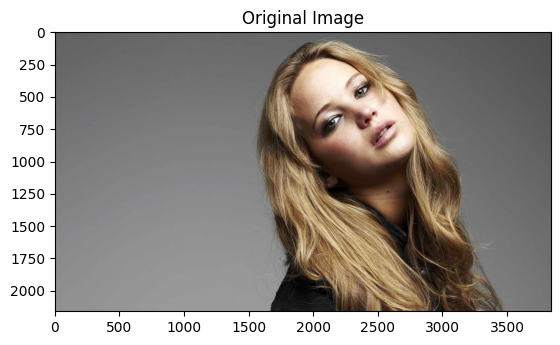

In [47]:
plt.imshow(cv.cvtColor(q5_img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

/tmp/ipython-input-4132692701.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(q5_img.flatten(),256,[0,256], color = 'r')


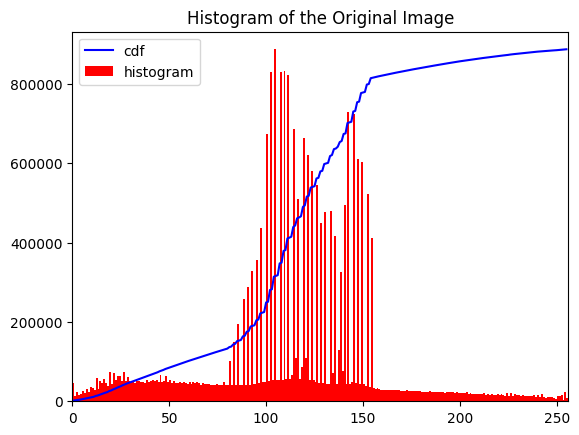

In [50]:
q5_hist_og_img, bins = np.histogram(q5_img.ravel(), bins=256, range=[0,256])
cdf = q5_hist_og_img.cumsum()
cdf_normalized = cdf * q5_hist_og_img.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(q5_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram of the Original Image')
plt.show()

In [118]:
q5_img_hsv = cv.cvtColor(q5_img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(q5_img_hsv)

Text(0.5, 1.0, 'V Plane')

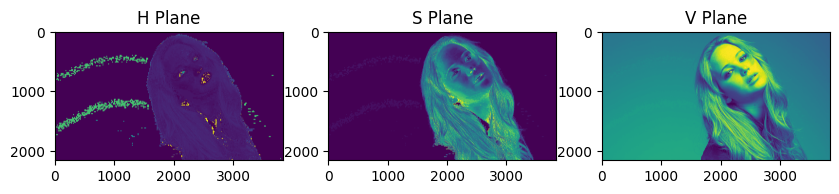

In [119]:
#display split planes
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(h)
ax[0].set_title('H Plane')
ax[1].imshow(s)
ax[1].set_title('S Plane')
ax[2].imshow(v)
ax[2].set_title('V Plane')

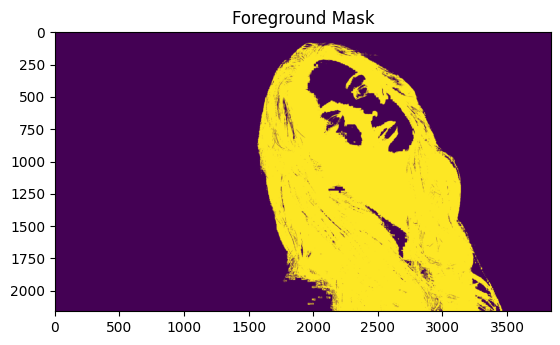

In [175]:
_, mask = cv.threshold(s, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(mask)
plt.title("Foreground Mask")
plt.show()


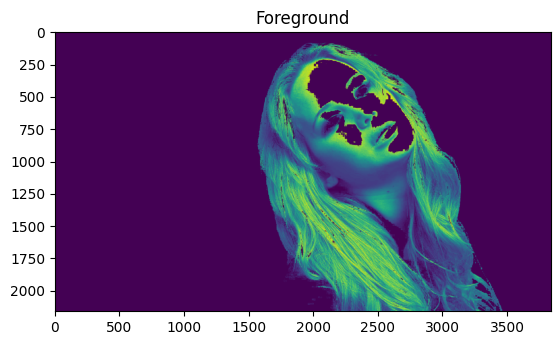

In [176]:
#extract foreground
q5_foreground = cv.bitwise_and(v, v, mask=mask)
plt.imshow(q5_foreground)
plt.title("Foreground")
plt.show()

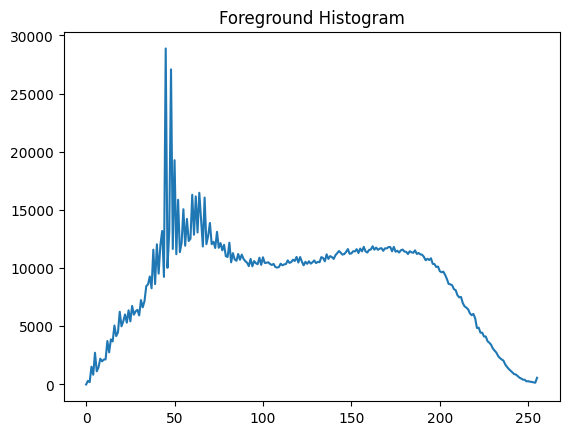

In [177]:
hist_fg = cv.calcHist([q5_foreground], [0], mask, [256], [0,256])
plt.plot(hist_fg)
plt.title("Foreground Histogram")
plt.show()

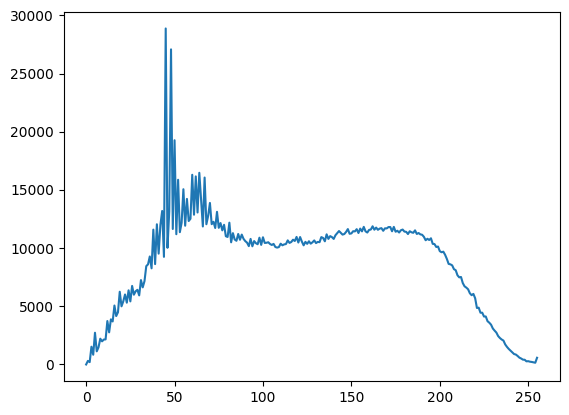

In [178]:
#alternative way to plot histogram
fhis, bins = np.histogram(q5_foreground[mask>0], bins=256, range=[0,256])
cdfhis = fhis[0].cumsum()
plt.plot(fhis)

In [179]:
#calcualate cumsum
cdf_hist_fg = hist_fg.cumsum()
cdf_norm = cdf_hist_fg * hist_fg.max()/ cdf_hist_fg.max()
cdf_n_viz = cdf_hist_fg / cdf_hist_fg[-1]


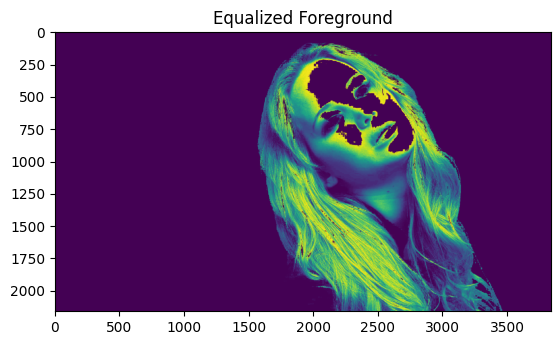

In [180]:
#Lookup table
L = 255
M = np.count_nonzero(mask)
N = 1
t = np.array([(L-1)/(M*N)*cdf_hist_fg[k] for k in range(256)], dtype=np.uint8)
#equalized image foreground
q5_foreground_eq = t[q5_foreground]
plt.imshow(q5_foreground_eq)
plt.title("Equalized Foreground")
plt.show()


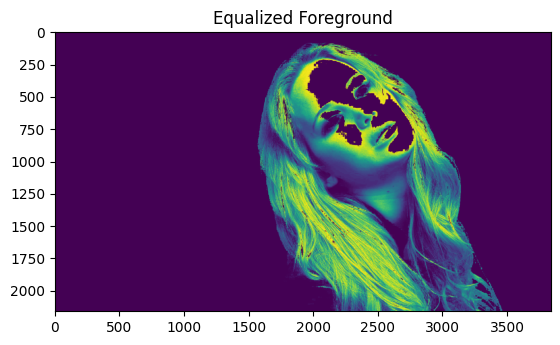

In [181]:
eq_alt = cv.equalizeHist(q5_foreground)
plt.imshow(eq_alt)
plt.title("Equalized Foreground")
plt.show()

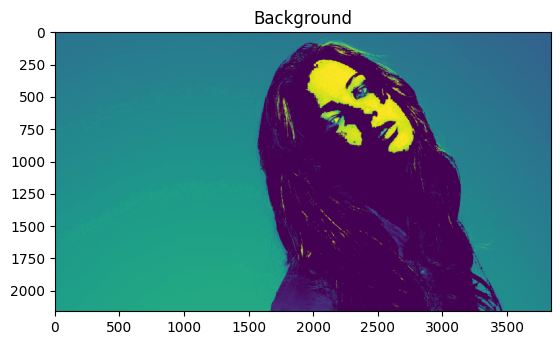

In [182]:
q5_background = cv.bitwise_and(v, v, mask=cv.bitwise_not(mask))
plt.imshow(q5_background)
plt.title("Background")
plt.show()

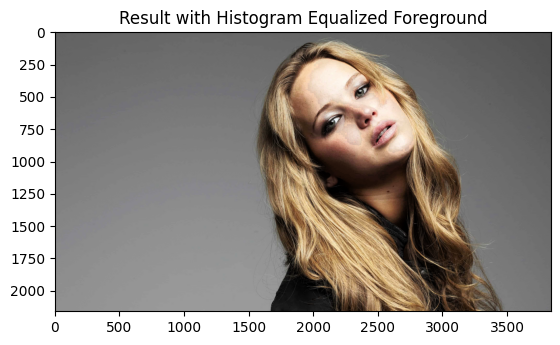

In [183]:
#add extracted background with foreground
q5_img_eq = cv.add(q5_background, q5_foreground_eq)
q5_merged = cv.merge([h, s, q5_img_eq])
q5_img_eq_bgr = cv.cvtColor(q5_merged, cv.COLOR_HSV2BGR)
plt.imshow(cv.cvtColor(q5_img_eq_bgr, cv.COLOR_BGR2RGB))
plt.title("Result with Histogram Equalized Foreground")
plt.show()

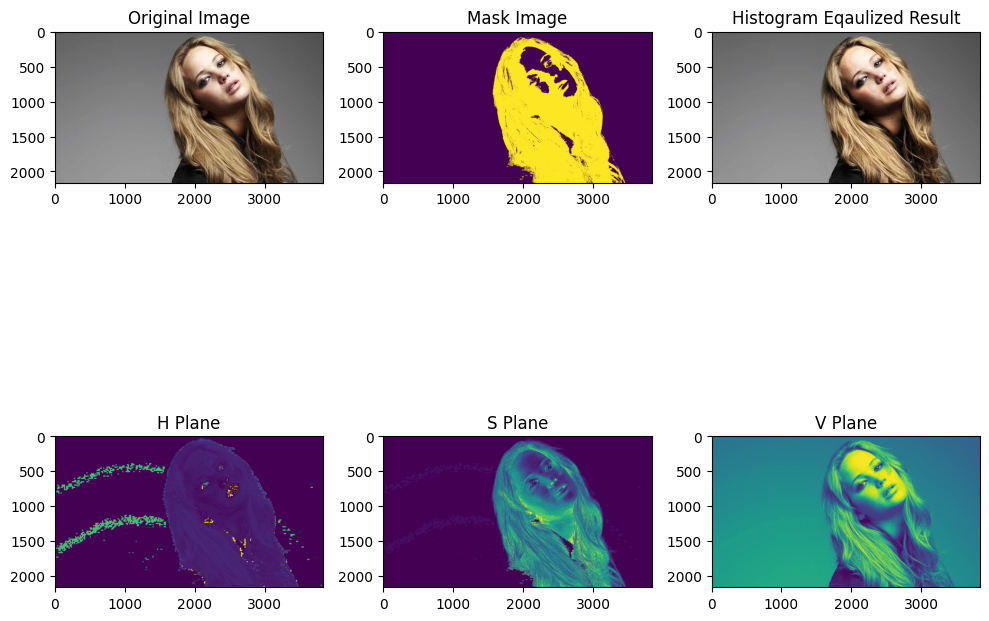

In [184]:
q5_fig, ax5 = plt.subplots(2,3, figsize=(10,10))
ax5[0,0].imshow(cv.cvtColor(q5_img, cv.COLOR_BGR2RGB))
ax5[0,0].set_title('Original Image')
ax5[0,1].imshow(mask)
ax5[0,1].set_title('Mask Image')
ax5[0,2].imshow(cv.cvtColor(q5_img_eq_bgr, cv.COLOR_BGR2RGB))
ax5[0,2].set_title('Histogram Eqaulized Result')
ax5[1,0].imshow(h)
ax5[1,0].set_title('H Plane')
ax5[1,1].imshow(s)
ax5[1,1].set_title('S Plane')
ax5[1,2].imshow(v)
ax5[1,2].set_title('V Plane')
plt.tight_layout()
plt.show()




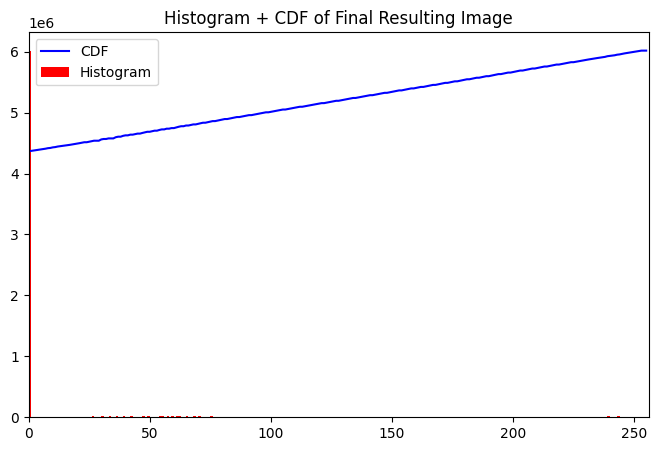

In [194]:
final_hist, bins = np.histogram(q5_foreground_eq.ravel(), bins=256, range=[0,256])
cdf_final = final_hist.cumsum()
cdf_final_normalized = cdf_final * final_hist.max() / cdf_final.max()  # scale for plotting

# Plot histogram + CDF
plt.figure(figsize=(8,5))
plt.plot(cdf_final_normalized, color='b')
plt.hist(q5_foreground_eq.flatten(), bins=256, range=[0,256], color='r')
plt.xlim([0,256])
plt.legend(('CDF','Histogram'), loc='upper left')
plt.title('Histogram + CDF of Final Resulting Image')
plt.show()



## Question 6 - Sobel Filtering

In [206]:
q6_img_path = base_path + "einstein.png";
q6_img = cv.imread(q6_img_path, cv.IMREAD_GRAYSCALE)
assert q6_img is not None

Text(0.5, 1.0, 'Original Image')

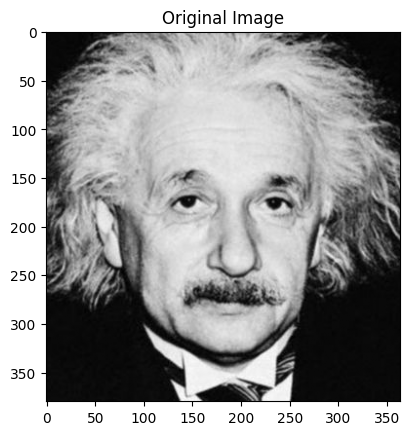

In [210]:
plt.imshow(q6_img, cmap="gray")
plt.title("Original Image")

In [218]:
q5_soble_img_x = cv.Sobel(q6_img, cv.CV_32F, 0, 1, ksize=3)
q5_soble_img_x_norm = cv.normalize(q5_soble_img_x, None, 0, 255, cv.NORM_MINMAX)
q5_soble_img_y = cv.Sobel(q6_img, cv.CV_32F, 1, 0, ksize=3)
q5_soble_img_y_norm= cv.normalize(q5_soble_img_y, None, 0, 255, cv.NORM_MINMAX)


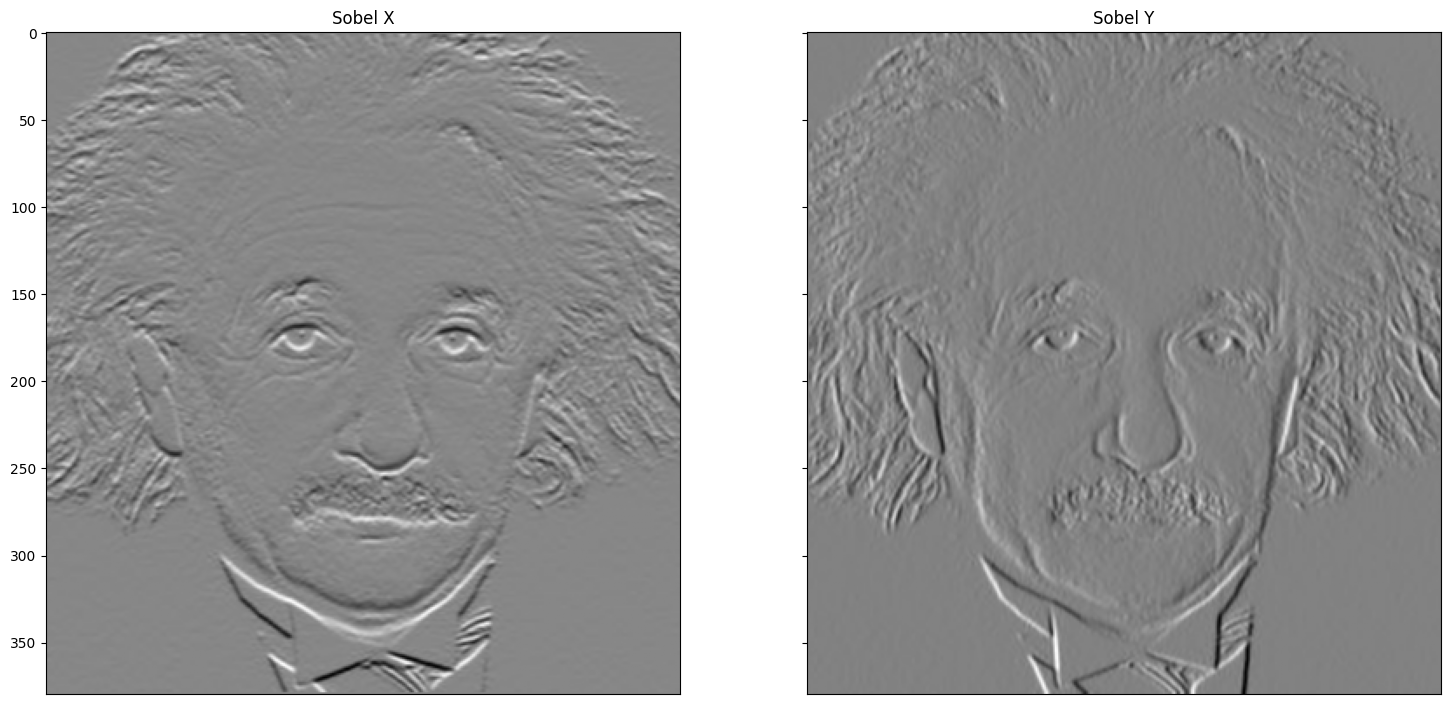

In [219]:
fig6, ax6 = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax6[0].imshow(q5_soble_img_x_norm, cmap='gray')
ax6[0].set_title('Sobel X')
ax6[0].set_xticks([]), ax[0].set_yticks([])
ax6[1].imshow(q5_soble_img_y_norm, cmap='gray')
ax6[1].set_title('Sobel Y')
ax6[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

In [227]:
#Sobel Filtering with Filter 2D
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).astype(np.float32)
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
q6_im_x = cv.filter2D(q6_img, cv.CV_32F, sobel_x)
q6_im_y = cv.filter2D(q6_img, cv.CV_32F, sobel_y)

#normalize
q6_im_x_norm = (q6_im_x - q6_im_x.min()) / (q6_im_x.max() - q6_im_x.min())
q6_im_y_norm = (q6_im_y - q6_im_y.min()) / (q6_im_y.max() - q6_im_y.min())

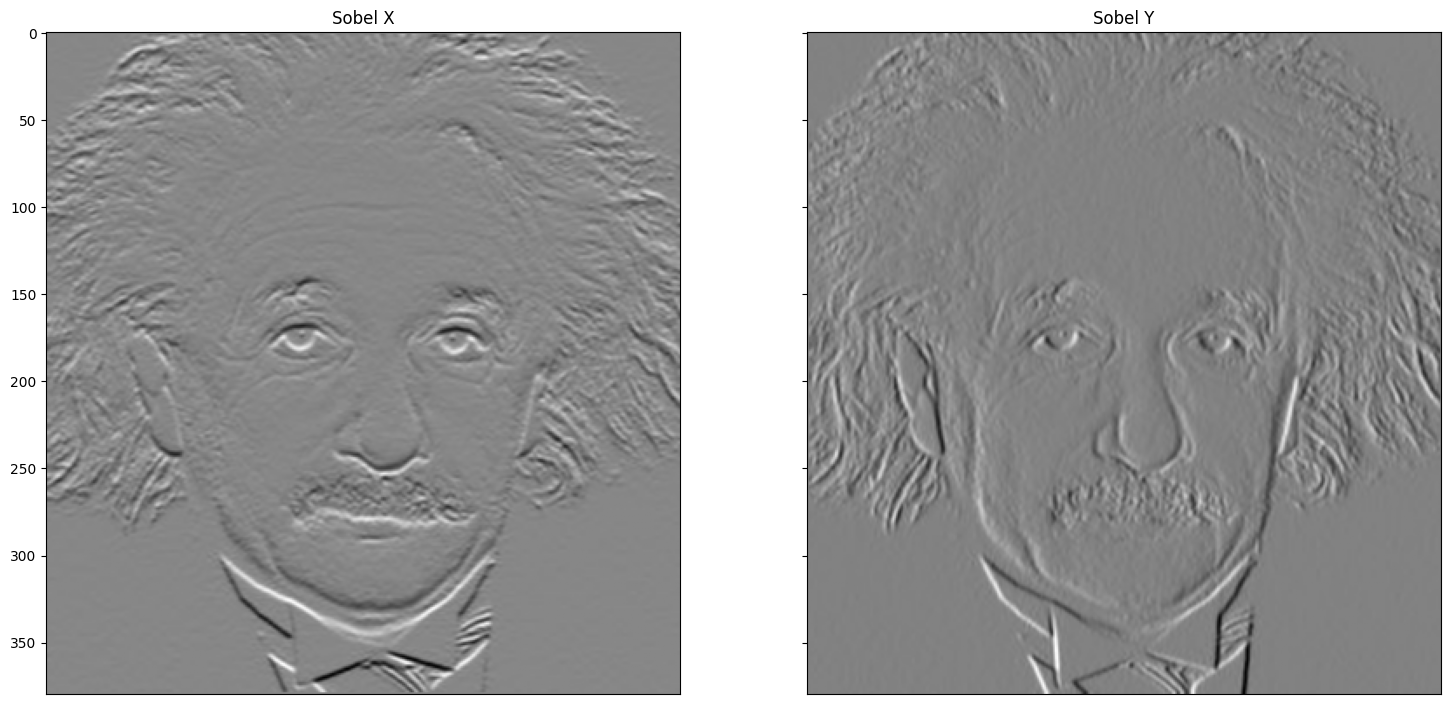

In [228]:
fig6, ax6 = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax6[0].imshow(q6_im_x_norm, cmap='gray')
ax6[0].set_title('Sobel X')
ax6[0].set_xticks([]), ax[0].set_yticks([])
ax6[1].imshow(q6_im_y_norm, cmap='gray')
ax6[1].set_title('Sobel Y')
ax6[1].set_xticks([]), ax[1].set_yticks([])
plt.show()